# 第四章 训练模型

## 线性回归

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)

In [3]:
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]

In [6]:
X_b[:5]

array([[1.        , 1.12882131],
       [1.        , 0.80755095],
       [1.        , 0.88807573],
       [1.        , 1.09342495],
       [1.        , 1.27794592]])

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[3.97671416],
       [3.1617004 ]])

In [9]:
X_new = np.array([[0], [2]])

In [10]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [11]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [12]:
y_predict = X_new_b.dot(theta_best)

In [13]:
y_predict

array([[ 3.97671416],
       [10.30011496]])

In [15]:
import matplotlib.pyplot as plt

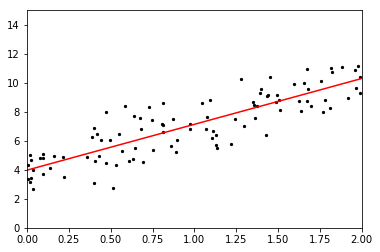

In [25]:
plt.scatter(X, y, c='black', s=5)
plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_reg.intercept_

array([3.97671416])

In [31]:
lin_reg.coef_

array([[3.1617004]])

In [32]:
lin_reg.predict(X_new)

array([[ 3.97671416],
       [10.30011496]])

## 批量梯度下降

In [33]:
eta = 0.1
n_iterations = 1000
m = 100

In [34]:
theta = np.random.randn(2, 1)

In [35]:
theta

array([[-0.45301355],
       [-1.08505882]])

In [37]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [38]:
theta

array([[3.97671416],
       [3.1617004 ]])

## 随机梯度下降

In [39]:
n_epochs = 50
t0, t1 = 5, 50

In [40]:
def learning_schedule(t):
    return t0 / (t + t1)

In [41]:
theta = np.random.randn(2, 1)

In [43]:
np.random.randint(m)

43

In [44]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [45]:
theta

array([[3.90641525],
       [3.26415201]])

In [46]:
from sklearn.linear_model import SGDRegressor

In [48]:
sgd_reg = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.1)

In [58]:
y.ravel()

array([ 6.39224079,  7.12722048,  5.1961704 ,  8.78253619, 10.23781299,
        9.585107  ,  7.97564627,  7.97522386,  4.9746721 ,  9.671807  ,
        4.34749533,  8.39680531, 10.74434103,  4.63108747,  2.67511719,
        7.05619326,  6.03395609,  7.46794968,  8.80366717,  4.99054432,
        4.90852276,  9.05831073,  8.7742513 ,  4.74419999,  5.7784113 ,
        6.49880093,  5.3039858 ,  2.7680627 ,  5.4761459 , 10.91168688,
        8.468129  ,  8.07895524,  4.82285647,  3.15400038,  8.37081284,
        8.28188058,  3.51682947,  8.70222908,  6.57738313,  4.88675022,
        3.11190724,  6.25929609,  8.81595724,  7.11098544,  7.52456661,
        4.58394579,  5.72066238,  3.38006971,  9.29927048,  3.44754394,
        3.96661427,  4.92707728,  9.93160105,  7.64232945,  4.69613187,
        4.50584058,  4.11079784,  7.50014189,  5.09919245,  6.88318902,
        7.15668958,  8.68797062,  8.6180734 ,  7.57306718,  8.12842003,
       10.37520842,  5.49180441,  3.69914579,  9.3204887 ,  7.60

In [57]:
X[:5]

array([[1.12882131],
       [0.80755095],
       [0.88807573],
       [1.09342495],
       [1.27794592]])

In [52]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=50, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [53]:
sgd_reg.intercept_

array([3.98451594])

In [54]:
sgd_reg.coef_

array([3.18085631])

## 小批量梯度下降

## 多项式回归

In [3]:
import numpy as np

In [19]:
m = 100

In [20]:
X = 6 * np.random.rand(m, 1) - 3

In [21]:
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [44]:
import matplotlib.pyplot as plt

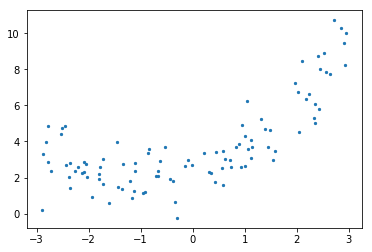

In [7]:
plt.scatter(X, y, s=5)

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [33]:
X_poly = poly_features.fit_transform(X)

In [34]:
X_poly[:5]

array([[-0.36166072,  0.13079848],
       [-0.56314219,  0.31712913],
       [-2.75176363,  7.57220308],
       [ 0.97947872,  0.95937857],
       [ 1.8236385 ,  3.32565738]])

In [35]:
X[:5]

array([[-0.36166072],
       [-0.56314219],
       [-2.75176363],
       [ 0.97947872],
       [ 1.8236385 ]])

In [41]:
from sklearn.linear_model import LinearRegression

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lin_reg.intercept_

array([2.2895521])

In [18]:
lin_reg.coef_

array([[0.93768253, 0.48004642]])

## 学习曲线

In [38]:
from sklearn.metrics import mean_squared_error

In [37]:
from sklearn.model_selection import train_test_split

In [36]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylabel("RMSE")
    plt.xlabel("Size of TrainingSet")
    plt.legend()

In [42]:
lin_reg = LinearRegression()

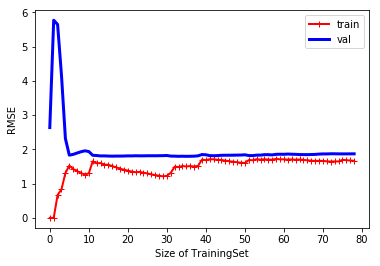

In [45]:
plot_learning_curves(lin_reg, X, y)

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
])

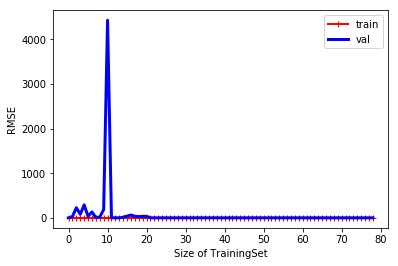

In [59]:
plot_learning_curves(polynomial_regression, X, y)

## 正则线性模型

### 岭回归（吉洪诺夫正则化）

In [60]:
from sklearn.linear_model import Ridge

In [61]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [62]:
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [63]:
ridge_reg.predict([[1.5]])

array([[5.18216498]])

In [64]:
X[:5]

array([[-2.12386323],
       [-2.89235825],
       [ 2.45588011],
       [-2.45124512],
       [ 0.57451709]])

In [65]:
from sklearn.linear_model import SGDRegressor

In [66]:
sgd_reg = SGDRegressor(penalty="l2")

In [67]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [68]:
sgd_reg.predict([[1.5]])

array([5.17433154])

### 套索回归（最小绝对收缩和选择算子回归）（Lasso回归）

- Lasso回归的一个重要特点是它倾向于完全消除掉最不重要特征的权重（也就是将它们设置为0）。

In [69]:
from sklearn.linear_model import Lasso

In [70]:
lasso_reg = Lasso(alpha=0.1)

In [71]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
lasso_reg.predict([[1.5]])

array([5.13664868])

### 弹性网络

- 弹性网络是岭回归与Lasso回归之间的中间地带。其正则项就是岭回归和Lasso回归的正则项的混合，混合比例通过r来控制。
- 当r=0时，弹性网络即等同于岭回归，而当r=1时，即相当于Lasso回归。

In [1]:
from sklearn.linear_model import ElasticNet

In [2]:
import numpy as np

In [3]:
import random

In [15]:
random.randrange(10)

8

In [16]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [22]:
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
elastic_net.predict([[1.5]])

array([5.42170844])

## 早期停止法

In [24]:
from sklearn.base import clone

In [25]:
from sklearn.linear_model import SGDRegressor

In [27]:
sgd_reg = SGDRegressor(n_iter_no_change=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

In [28]:
minimum_val_error = float("inf")

In [29]:
best_epoch = None

In [30]:
best_model = None

In [50]:
X[:5]

array([[-0.36166072],
       [-0.56314219],
       [-2.75176363],
       [ 0.97947872],
       [ 1.8236385 ]])

In [51]:
poly_model = PolynomialFeatures(degree=10, include_bias=False)

In [52]:
X_poly = poly_model.fit_transform(X)

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2)

In [54]:
X_train[:5]

array([[ 2.80515580e+00,  7.86889905e+00,  2.20734878e+01,
         6.19195722e+01,  1.73694047e+02,  4.87238863e+02,
         1.36678092e+03,  3.83403342e+03,  1.07550611e+04,
         3.01696219e+04],
       [ 6.16596005e-01,  3.80190633e-01,  2.34424025e-01,
         1.44544917e-01,  8.91258186e-02,  5.49546236e-02,
         3.38848014e-02,  2.08932331e-02,  1.28826841e-02,
         7.94341153e-03],
       [-2.01383094e+00,  4.05551507e+00, -8.16712173e+00,
         1.64472024e+01, -3.31218852e+01,  6.67018773e+01,
        -1.34326304e+02,  2.70510468e+02, -5.44762351e+02,
         1.09705928e+03],
       [ 1.15113262e+00,  1.32510632e+00,  1.52537312e+00,
         1.75590676e+00,  2.02128155e+00,  2.32676314e+00,
         2.67841296e+00,  3.08320854e+00,  3.54918194e+00,
         4.08557912e+00],
       [-1.98477915e+00,  3.93934827e+00, -7.81873631e+00,
         1.55184648e+01, -3.08007254e+01,  6.11326375e+01,
        -1.21334784e+02,  2.40822750e+02, -4.77979973e+02,
         9.

In [56]:
y_train[:5]

array([[9.12046265],
       [2.04055905],
       [2.77957703],
       [4.38063141],
       [2.97663314]])

In [60]:
for epoch in range(1000):
    sgd_reg.fit(X_train, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

### 逻辑回归

### 概率估算

### 训练和成本函数

### 决策边界

In [61]:
from sklearn import datasets

In [62]:
iris = datasets.load_iris()

In [63]:
list(iris.keys())

['target_names', 'feature_names', 'target', 'DESCR', 'filename', 'data']

In [64]:
X = iris["data"][:, 3:]

In [65]:
X[:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [66]:
y = (iris["target"] == 2).astype(np.int)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_reg = LogisticRegression()

In [69]:
log_reg.fit(X, y)

d:\python3.5.3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [72]:
X_new[:5]

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201]])

In [75]:
y_proba = log_reg.predict_proba(X_new)

In [76]:
y_proba[:5]

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       [0.98520422, 0.01479578],
       [0.98508919, 0.01491081]])

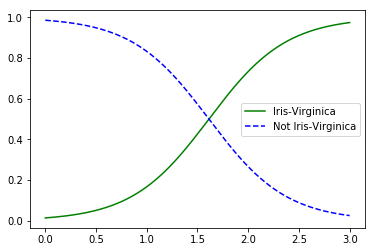

In [79]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()

In [80]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax回归

In [81]:
X= iris["data"][:, (2, 3)]

In [82]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [83]:
y = iris["target"]

In [84]:
y[:5]

array([0, 0, 0, 0, 0])

In [85]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

In [86]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
softmax_reg.predict([[5, 2]])

array([2])

In [89]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])